<a href="https://colab.research.google.com/github/lalitbhattarai/Pytorch_Fundamentals/blob/main/Neural_Network_Classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#02. Neural Network Classification with PyTorch

Classification is a problem of predecting wheater something is one things or another there be multiple things as a Option.


## 1. Make classification data and get it ready

In [1]:
import sklearn


In [2]:
from sklearn.datasets import make_circles

#Make a 1000 sampels
n_samples=1000

#create circles
X, y =make_circles(n_samples=1000,
                   noise=0.03,
                   random_state=42)


In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f"First five value of x are :{X[:5]}")

First five value of x are :[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [5]:
print(f"First five value of y are :{y[:5]}")

First five value of y are :[1 1 1 1 0]


In [6]:
#Make Datafreame of circle data
import pandas as pd
circles =pd.DataFrame({"X1" : X[:,0],
                       "X2": X[:,1],
                       "label" :y
                       })
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


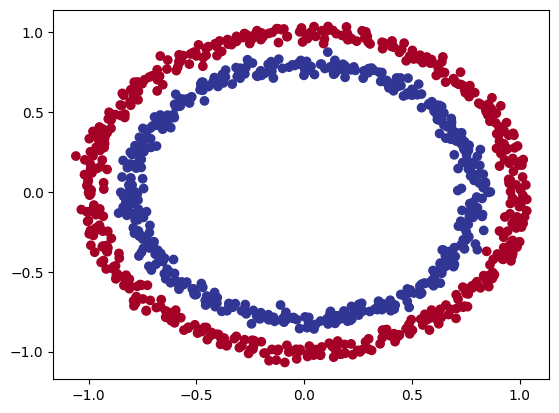

In [7]:
#Visualize visualize visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
          )
plt.show()

Note :The data we're working often refered as a toy datasets a datasets that is small enourh to experiment but still sizable enough oto practice the fundamentals

### 1.1 check input and Output shapes

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
#View the first example of features and lales
X_sample=X[0]
y_sample=y[0]
print(f"Value of one sample of X :{X_sample} and same of y: {y_sample}")
print(f"Shape of one sample of X is x: {X_sample.shape}  and the sape of y: {y_sample.shape}")

Value of one sample of X :[0.75424625 0.23148074] and same of y: 1
Shape of one sample of X is x: (2,)  and the sape of y: ()


### 1.2 Turn our data into tensors and create train adn test splits

In [11]:

import torch
torch.__version__

'2.6.0+cu124'

In [12]:
type(X),X.dtype

(numpy.ndarray, dtype('float64'))

In [13]:
#Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [15]:
#Split data into training  and Training test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2, # 0.2 = 20%  of data will be test and 80% will be tyrain
                                               random_state=42)

In [16]:
len(X_train),len(X_test),len(y_test),len(y_train)

(800, 200, 200, 800)

In [17]:
n_samples

1000

## Building a Model

Let's build a model to classify our blue and red dits

To do so ,We want to:
1. Setup device agonistic code so our will run on an acceletor (GPU) if there is one
2. construct a model (by subclass nn.Module)
3. define a loss fuction and optimizer
4. Create a traininga and testing loop

In [18]:
# import pytorch and nn
import torch
from torch import nn

# Make device a device diagonistic code \
device ="cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

now we've setup device agonistic code ,let's create a model that:

1. subclass`nn.module`(almost all moded in pytorch subclass nn.module )
2. Create 2 nn.Linear() layer that are capable of handeling the shapes of our modules
3. Defines a forward() method that outlines the forward pass (or forward computations ) of the model
4. Instatiate an instance ofour model class and send it to the target device

In [19]:
# 1. Construct a model hat subclass nn.Modules
class circleModel(nn.Module):
  def __init__(self) -> None:
    super().__init__()
    # 2. create 2 nn.Linear layer capable of handeling the shaoes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5) # this means takes two featuresa asa input ans upsccale it as 5 features
    self.layer_2=nn.Linear(in_features=5,out_features=1) #takes in 5 features from layer 1 and make it 1 features (same shapes as y)

   #3. Define a forward () method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x))  #x -> layer_1  -> layer_2 -> Output


   #Instantiate an instance of our model class and send it to the target devices
model_0=circleModel().to(device)
model_0

circleModel(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
#This is a easier and simpler way to create a model
#Lets's Replicates the model above using nn.Sequential()
model_0 =nn.Sequential(

              nn.Linear(in_features=2,out_features=5),
              nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6547, -0.5096],
                      [-0.1142, -0.3674],
                      [-0.4273, -0.3005],
                      [ 0.1275,  0.1880],
                      [ 0.4370, -0.0620]], device='cuda:0')),
             ('0.bias',
              tensor([-0.4428, -0.1935, -0.2737,  0.3803,  0.3387], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1222, -0.0580, -0.0243, -0.2607,  0.0904]], device='cuda:0')),
             ('1.bias', tensor([-0.2316], device='cuda:0'))])

In [24]:
#Make predictions
with torch .inference_mode():
 untrained_preds=model_0(X_test.to(device))
print(f"Lwngth of Prediction : {len(untrained_preds)} ,Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)} ,shape:{X_test.shape}")
print(f"\n First 10 predictions:\n{untrained_preds[:10]}")
print(f"\n First 10 lables:\n{y_test[:10]}")

Lwngth of Prediction : 200 ,Shape : torch.Size([200, 1])
Length of test samples : 200 ,shape:torch.Size([200, 2])

 First 10 predictions:
tensor([[-0.1820],
        [-0.1942],
        [-0.1996],
        [-0.1769],
        [-0.2779],
        [-0.2847],
        [-0.2567],
        [-0.2781],
        [-0.1963],
        [-0.1958]], device='cuda:0')

 First 10 lables:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [25]:
y_test[:10] ,X_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

### 2.1  setup loss functiona and Optimizer

Which loss function or optimizer should usee

Again ... this i8s problem specific

for example for regression you might want MEA  or MSE (Mean absulate error and mean squered error)

For classification youmight want binary cross entropy or caerogrical cross entropy(cross entropy)

for reminder loss functiopn shows how *wrong* your data is

and fro optimizer ,two of the most common are SGD and adam ,however PyTorch has many bulit_in options.


In [26]:
#setup th Loss function

loss_fn =nn.BCEWithLogitsLoss()#BCEWithLogitsLoss = sigmoid activation function build_in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.1)


In [27]:
#calculate accuracy out of 100 examples ,what percentage does our model get right
def accuracy_fn(y_true,y_preds):
  correct =torch.eq(y_true,y_preds).sum().item()
  acc=(correct /len(y_preds)) *100
  return acc

## 3.Train model

To train our  mopdel,we're going to need to build a  training loop:

1. Forward pass
2. calculate the loss
3. optimizer zero grad
4. Loss backward(Backtrackking)
5. Optimizer step ( graiiend descend)





### 3.1 Going from raw logits -> prediction probabilities ->prediction lables
Our model outputs are going to be raw **logits**

we can convert these **logits** into **prediction probilities** by passing them to some kind of activation function (eg. sigmodfro binary classification and softmax for multiclass classification)

Then we can convert our model's predictions probilities **predictions labels** by either rounding them taking the  argmax().

In [28]:
#viewing the first five output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]

y_logits

tensor([[-0.1820],
        [-0.1942],
        [-0.1996],
        [-0.1769],
        [-0.2779]], device='cuda:0')

In [29]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [30]:
#Use the sigmoid activation FUnction on our model logits to turn them into prediction possibilities
y_pred_probs =torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.4546],
        [0.4516],
        [0.4503],
        [0.4559],
        [0.4310]], device='cuda:0')

For our prediction probebalities values  ,we need to perform a range -style rounding on them:

.  y_pred_probs >=0.5 ,y=1(Class 1)

.  y_pred_probs <0.5 ,y=0(class 0)



In [31]:
#find the prediction labels:
y_preds =torch.round(y_pred_probs)

#In full(logits->Pred Probs ->pred labels)

y_pred_labels =torch.round(torch.sigmoid(model_0 (X_test.to(device ))[:5]))

#Check for equality
print(torch.eq(y_preds.squeeze() , y_pred_labels.squeeze()))

#Get rid of Extra  Deminsion
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and Testing Loops

In [32]:
device

'cuda'

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0.to(device)


# Set the number of epochs
epochs = 100

# Move data to the device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loops
for epoch in range(epochs):

    # Forward pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

    # Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_preds=y_preds)

    # Optimize the zero grads
    optimizer.zero_grad()

    # Loss backward (backpropagation)
    loss.backward()

    # Optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():  # Correct usage
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # Calculate test loss/acc
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_preds=test_pred)

    # Corrected print statement
    if epoch  % 10 == 0:  # Fixed the condition to check every 10 epochs
        print(f"Epoch: {epoch } | Loss: {loss:.5f} | ACC: {acc:.2f}% | "
              f"Test Loss: {test_loss:.5f} | Test ACC: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69984 | ACC: 50.00% | Test Loss: 0.69943 | Test ACC: 50.00%
Epoch: 10 | Loss: 0.69604 | ACC: 50.00% | Test Loss: 0.69653 | Test ACC: 50.00%
Epoch: 20 | Loss: 0.69441 | ACC: 50.00% | Test Loss: 0.69545 | Test ACC: 50.00%
Epoch: 30 | Loss: 0.69369 | ACC: 42.38% | Test Loss: 0.69507 | Test ACC: 38.50%
Epoch: 40 | Loss: 0.69337 | ACC: 47.75% | Test Loss: 0.69497 | Test ACC: 47.00%
Epoch: 50 | Loss: 0.69322 | ACC: 49.12% | Test Loss: 0.69495 | Test ACC: 48.50%
Epoch: 60 | Loss: 0.69315 | ACC: 49.25% | Test Loss: 0.69496 | Test ACC: 47.00%
Epoch: 70 | Loss: 0.69310 | ACC: 49.75% | Test Loss: 0.69497 | Test ACC: 46.00%
Epoch: 80 | Loss: 0.69307 | ACC: 49.88% | Test Loss: 0.69498 | Test ACC: 46.00%
Epoch: 90 | Loss: 0.69306 | ACC: 50.25% | Test Loss: 0.69498 | Test ACC: 46.00%


## 4. make prediction and avaulate the model

 from the  metrices it look like our model is not learning anything

 So to inspect it let's make some prediction and make them visual

 In other words " Visualize ,Visualize ,Visualize"






In [34]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


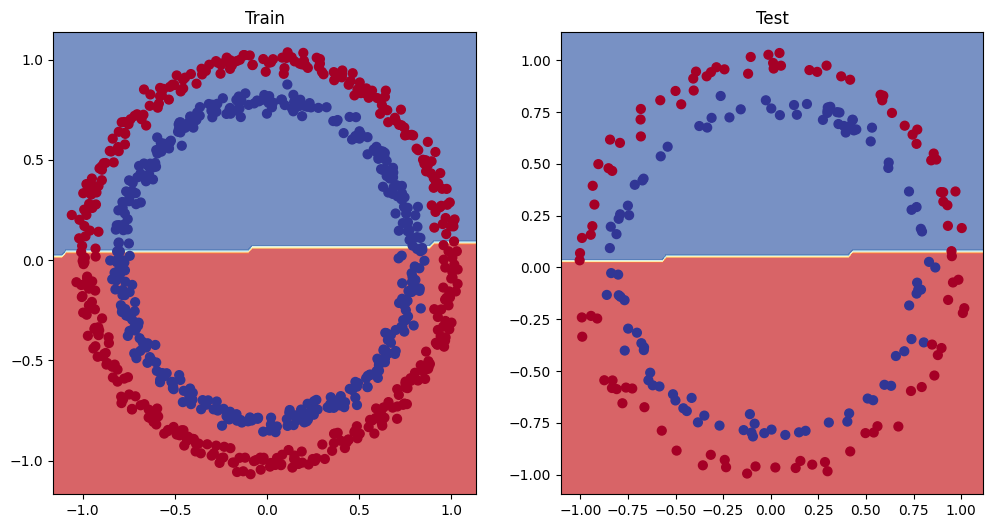

In [35]:
#plot decicion boundry of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Imporving a Model (from a model prospective )

* Add more layers -Give the model more chances to learn about patterns in the data
* Add more hidden Units -go from 5 hidden units ti 10 hidden units
* fit for longer
* Changing the activation funcions
* Change the learning rate
* Change the loss function

These options are all from model's perspective beacause they deal dirctly with the model ,rather than the data

And because these options are all values we (as a mechhine learning engineer and data scientists )can change ,they are referes as **hyperparameters**

Let's improve our model by :
* Adding more hidden units 5 ->10
* Increase the no of layer 2 ->3
* increase the number of epoch 100->1000

In [36]:
class circleModelv1(nn.Module):
  def __init__(self) :
    super().__init__()
    self.layer_1 =nn.Linear(in_features=2,out_features=10)
    self.layer_2 =nn.Linear(in_features=10,out_features=10)
    self.layer_3 =nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)


    return self.layer_3(self.layer_2(self.layer_1(x)))



model_1=circleModelv1().to(device)
model_1



circleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
#Creating a loss function
loss_fn =nn.BCEWithLogitsLoss()

#Create an Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [38]:
#Write a training and avalution loop for model1
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1.to(device)

#train thr longer
epochs =1000

#put data on the target device
X_train,y_train =X_train.to(device),y_train.to(device)
X_test,y_test =X_test.to(device),y_test.to(device)

for epoch in range(epochs):

  ###Training
  model_1.train

  #1. Forward pass
  y_logits =model_1(X_train).squeeze()
  y_preds =torch.round(torch.sigmoid(y_logits)) # Logits->pred probabilityes ->prediction lables

  #Calculate the loss /acc
  loss =loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_preds=y_preds)

  #3. Optimizer zero grade
  optimizer.zero_grad()

  # 4. loss backward (backpropragation)
  loss.backward()

  #5. optimizer step(gradiesnt decent)
  optimizer.step()


  ### Testing
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits =model_1(X_test).squeeze()
    test_pred =torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss
    test_loss =loss_fn(test_logits,
                       y_test)
    test_acc =accuracy_fn(y_true=y_test,
                          y_preds=test_pred)



    #Print ourt what is happening
  if epoch %100 ==0:
    print(f"Epochs: {epoch} | Loss: {loss:.5f} ,Acc:{acc:.2f}% | Test loss :{test_loss:.5f} | Test acc: {test_acc:.2f}")







Epochs: 0 | Loss: 0.69396 ,Acc:50.88% | Test loss :0.69261 | Test acc: 51.00
Epochs: 100 | Loss: 0.69305 ,Acc:50.38% | Test loss :0.69379 | Test acc: 48.00
Epochs: 200 | Loss: 0.69299 ,Acc:51.12% | Test loss :0.69437 | Test acc: 46.00
Epochs: 300 | Loss: 0.69298 ,Acc:51.62% | Test loss :0.69458 | Test acc: 45.00
Epochs: 400 | Loss: 0.69298 ,Acc:51.12% | Test loss :0.69465 | Test acc: 46.00
Epochs: 500 | Loss: 0.69298 ,Acc:51.00% | Test loss :0.69467 | Test acc: 46.00
Epochs: 600 | Loss: 0.69298 ,Acc:51.00% | Test loss :0.69468 | Test acc: 46.00
Epochs: 700 | Loss: 0.69298 ,Acc:51.00% | Test loss :0.69468 | Test acc: 46.00
Epochs: 800 | Loss: 0.69298 ,Acc:51.00% | Test loss :0.69468 | Test acc: 46.00
Epochs: 900 | Loss: 0.69298 ,Acc:51.00% | Test loss :0.69468 | Test acc: 46.00


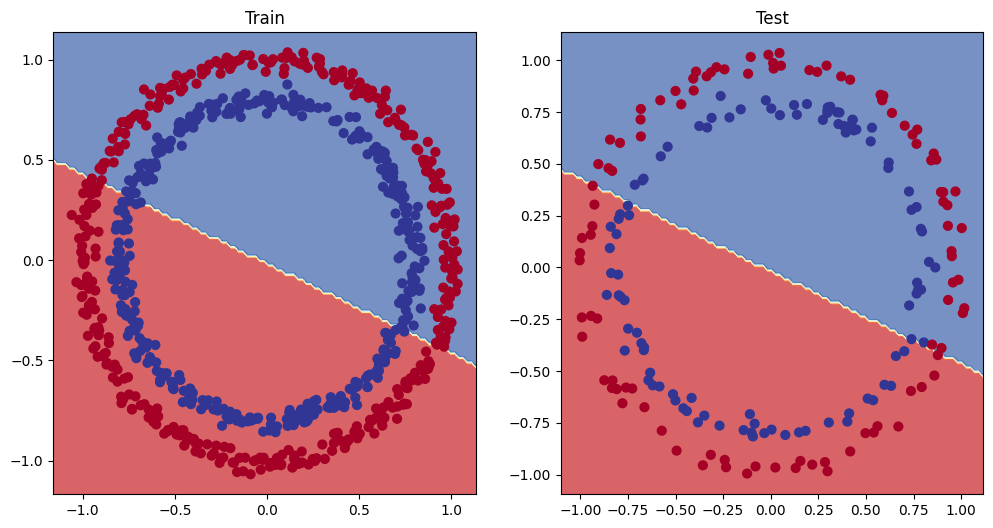

In [39]:
#plot decicion boundry of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot to  a larger problem is to test out a smaller model


In [57]:
# Creating some data (same as anotebook 01)
weight =0.7
bias=0.3
start=0
end=1
step=0.01

# create data
X_regression =torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight *X_regression +bias #Linear regression formula without epsilon

#Check the data
print(len(X_regression))
X_regression[:5] ,y_regression[:5]


100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [58]:
#Create treining and test splits
train_split =int(0.8 *len(X_regression))
X_train_regression,y_train_regression =X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]


#Check the length of each
len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

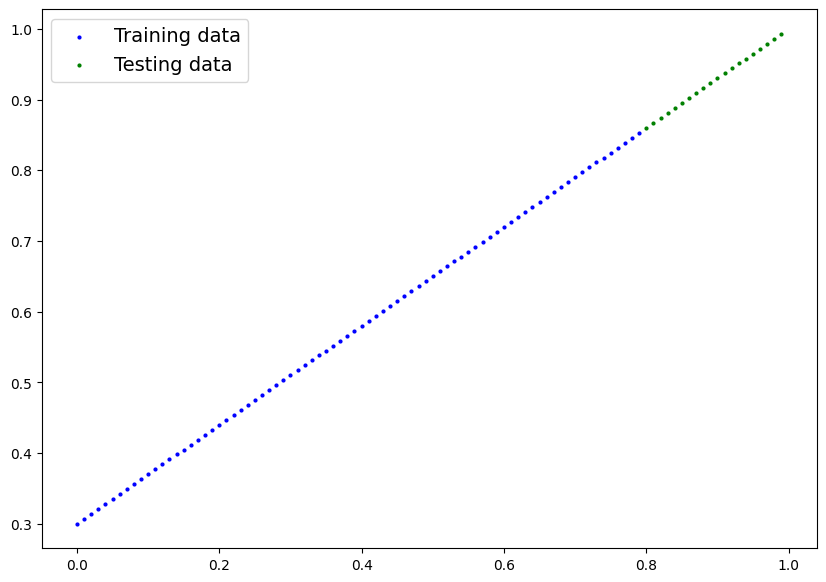

In [59]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)


### 5.2 Adjust  `model_1` to fit a straigh line

In [99]:
#Same architecture  as model_1 (BUT USING NN.SEQUENTIAL())
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1),
) .to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [100]:
#Loss and Optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)


In [101]:
#Tran the mdoel
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set the number of epoch
epochs=1000

#Put the data on the target device
X_train_regression ,y_train_regression =X_train_regression.to(device),y_train_regression.to (device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

#Training
for epoch in range(epochs):
  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss =loss_fn(test_pred,y_test_regression)



    #print out what happening

  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")






Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


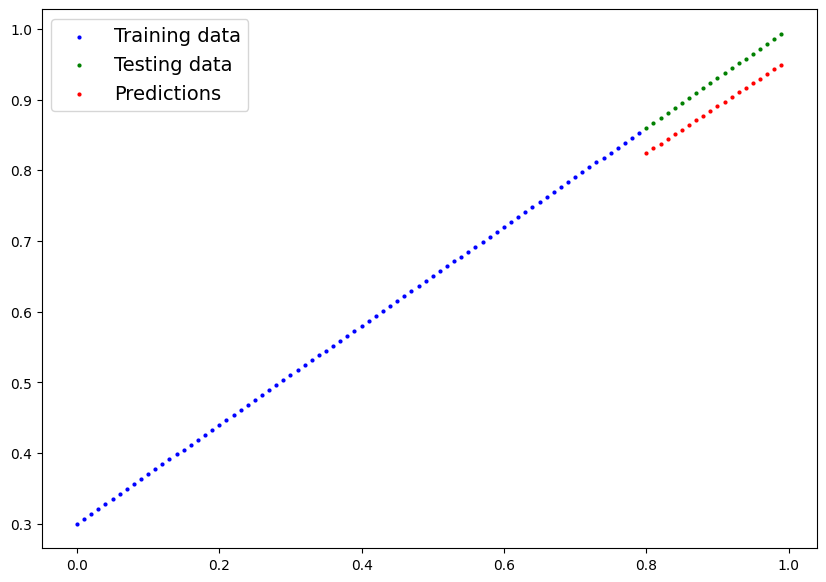

In [102]:
#Turn on evaulation mode
model_2.eval()

#make prediction (inference)
with torch.inference_mode():
  y_preds=model_2(X_test_regression)

#Plot data and predictions
plot_predictions(train_data =X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels =y_test_regression.cpu(),
                 predictions=y_preds.cpu());
